## R Map Generation

### Install Libraries

In [12]:
install.packages("devtools")
devtools::install_github("wmurphyrd/fiftystater")
library(fiftystater)
library(dplyr)
install.packages('rworldmap',dependencies=TRUE)
library(rworldmap)
library(readxl)
library(ggplot2)
library(writexl)
library(readr)
library(stringr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Using github PAT from envvar GITHUB_TOKEN

Skipping install of 'fiftystater' from a github remote, the SHA1 (28e7fa54) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Center Count

In [13]:
# Read the CSV files into data frames
df1 <- read_excel("/workspaces/PASS/SGMC/data/output/cleaned_chatgpt_results_1.xlsx")

df2_World <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/world_centercount.xlsx")
df2_state <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/us_centercount.xlsx")

str(df1)
str(df2_World)
str(df2_state)
# Clean the country names in df2_World
df1 <- df1 %>%
  mutate(Country_chatGPT = str_to_lower(str_trim(str_remove_all(Country_chatGPT, "\\.$"))))
df2_World <- df2_World %>%
  mutate(region = str_to_lower(str_trim(str_remove_all(region, "\\.$| \\(Uk\\)"))))

# Get the count of each unique country
country_counts <- df1 %>%
  count(Country_chatGPT) %>%
  rename(Count = n)

# Merge the DataFrames on the cleaned country names
result_df <- merge(country_counts, df2_World, by.x = 'Country_chatGPT', by.y = 'region', all.x = TRUE)

# Select the necessary columns for the final output
result_df <- result_df %>%
  select(Country_chatGPT, Count, lat, long)

# Rename state_Provence to id
result_df <- result_df %>% rename(region = Country_chatGPT)
result_df <- result_df %>% rename(center_count = Count)
result_df <- result_df %>% mutate(sample = center_count)

# Reorder columns
result_df <- result_df %>% select(region,sample, center_count, lat, long)
write_xlsx(result_df, "/workspaces/PASS/SGMC/data/output/country_counts_Global_R.xlsx")

# Clean the state names in df1
df1$state_Provence <- tolower(trimws(gsub('\\.$', '', df1$state_Provence)))
# Count the samples by state
country_counts <- df1 %>%
  count(state_Provence) %>%
  rename(States = state_Provence, Count = n)

# Get the first lat and long value for each state
lat_long_df <- df1 %>%
  distinct(state_Provence, .keep_all = TRUE) %>%
  select(state_Provence, Lat_chatGPT, Long_chatGPT) %>%
  rename(States = state_Provence, lat = Lat_chatGPT, long = Long_chatGPT)

# Merging the count data with lat-long data
result_df <- merge(country_counts, lat_long_df, by = 'States', all.x = TRUE)

# Add sample column (since it's same as Count in the example)
result_df$sample <- result_df$Count

# Select necessary columns for output
result_df <- result_df %>%
  select(States, sample, Count, lat, long)

# Save the result to a new CSV file
write_xlsx(result_df, "/workspaces/PASS/SGMC/data/output/country_counts_States_R.xlsx")

# 1. Filter rows for the United States
us_df <- df1[df1$Country_chatGPT == "united states",]
# 2. Count occurrences by state_Provence
state_counts <- us_df %>%
  count(state_Provence) %>%
  rename(Count = n)

# 3. Clean the state names in us_df
us_df$state_Provence <- tolower(trimws(gsub('\\.$', '', us_df$state_Provence)))

# 4. Get the first lat and long value for each state
lat_long_df <- us_df %>%
  distinct(state_Provence, .keep_all = TRUE) %>%
  select(state_Provence, Lat_chatGPT, Long_chatGPT) 

# Merging the count data with lat-long data
result_df <- merge(state_counts, lat_long_df, by = "state_Provence", all.x = TRUE)

# Add sample column (same as Count)
result_df$sample <- result_df$Count

# Rename state_Provence to id
result_df <- result_df %>% rename(id = state_Provence)
result_df <- result_df %>% rename(center_count = Count)
result_df <- result_df %>% rename(lat = Lat_chatGPT)
result_df <- result_df %>% rename(long = Long_chatGPT)

# Reorder columns
result_df <- result_df %>% select(id, sample, center_count, lat, long)
 
# Save the result to an Excel file
write_xlsx(result_df, "/workspaces/PASS/SGMC/data/output/us_state_counts.xlsx")

tibble [37 × 11] (S3: tbl_df/tbl/data.frame)
 $ Acc                  : chr [1:37] "SRR8606903" "SRR11788653" "SRR9158324" "SRR11881309" ...
 $ ID                   : num [1:37] 7314038 10848896 7959983 10964535 9209919 ...
 $ Center_Names         : chr [1:37] "AUSTRALIAN INSTITUTE OF MARINCE SCIENCES" "CLARK UNIVERSITY" "CALIFORNIA STATE UNIVERSITY FULLERTON" "CALIFORNIA STATE UNIVERSITY, FULLERTON" ...
 $ Submitted_by         : chr [1:37] "Australian Institute of Marince sciences" "Clark University" "California State University Fullerton" "California State University, Fullerton" ...
 $ Biosample_Submission : chr [1:37] "Australian Institute of Marince sciences, Patrick Laffy" "Clark University, Nathan Ahlgren" "California State University Fullerton, Maria Ramirez" "California State University, Fullerton, Joshua Der" ...
 $ Bioproject_Submission: chr [1:37] NA "Clark University" "California State University Fullerton" "California State University, Fullerton" ...
 $ Institute_chatGPT   

### US Map

Warning message:
“Unknown or uninitialised column: `region`.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Saving 6.67 x 6.67 in image
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


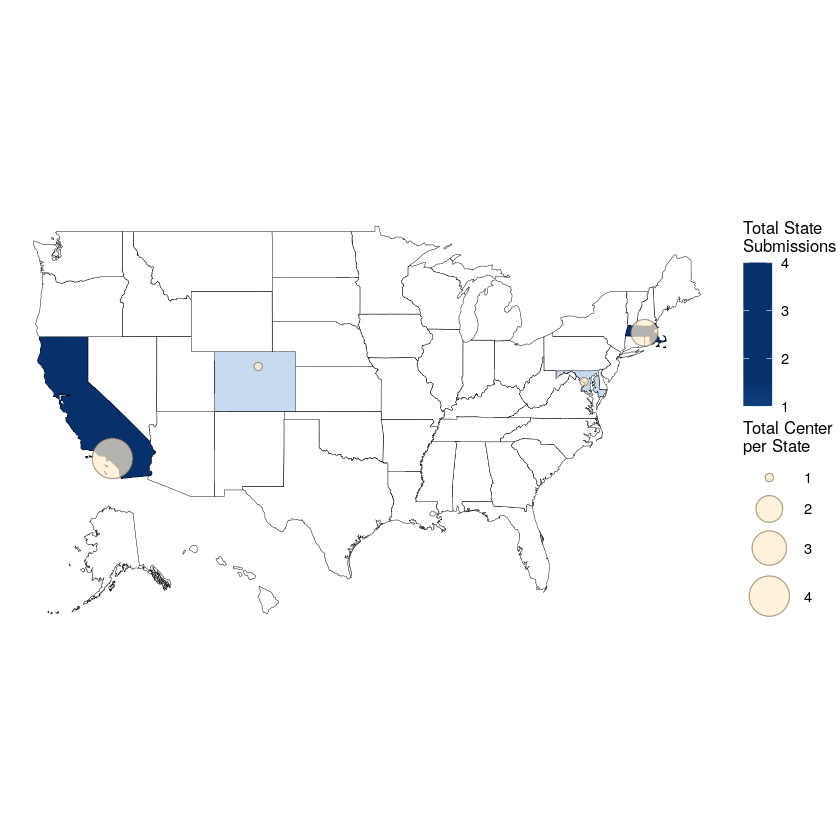

In [14]:
merge_map <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/fiftystater_submissions.xlsx") 
# To sample repo data use this line:
center <- read_excel("/workspaces/PASS/SGMC/data/output/us_state_counts.xlsx")
# To view paper SGMC data use this line by uncommenting and commenting above line:
# center <- read_excel("/Users/svd8/Desktop/PASS_script/SGMC/PASS/SGMC/rstudio_maps/data/us_centercount.xlsx")
# Merge the dataframes on the id column
merged_data <- merge(merge_map, center, by="id", all.x=TRUE)

# Replace the sample values in the merged dataframe
merged_data$sample <- ifelse(!is.na(merged_data$sample.y), merged_data$sample.y, merged_data$sample.x)

# Remove the unwanted columns and adjust the order
merged_data <- merged_data[, c("long.x", "lat.x", "order", "hole", "piece", "id", "group", "sample")]

# Rename the columns to remove the .x suffix
colnames(merged_data) <- c("long", "lat", "order", "hole", "piece", "id", "group", "sample")
# Sort the merged data frame by the 'order' column in ascending order
merged_data <- merged_data[order(merged_data$order), ]

write_xlsx(merged_data, "/workspaces/PASS/SGMC/rstudio_maps/data/fiftystater_submissions.xlsx")

map <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/fiftystater_submissions.xlsx") 


unique_samples <- sort(unique(center$sample))
color_breaks <- unique_samples
colors <- c('#c6dbef','#4292c6', '#2171b5','#08306b')

p1<-ggplot(data = map) + 
   geom_map(map = map, aes(map_id = id, fill = sample), color = "black", size=0.13) + 
  expand_limits(x = map$long, y = map$lat) +
  theme_void() +
  coord_fixed(1.3) +
 scale_fill_gradientn(limits = range(center$sample),
                      na.value = "white",
                      colors =  colors[c(1, seq_along(colors), length(colors))], 
                      values  = c(0, scales::rescale(color_breaks, from = range(map$sample)), 1),
                      guide="colorbar")+ geom_point(data=center, aes(x=long, y=lat, size=sample),colour="#8B7357",fill="#FFECCC",pch=21, alpha=I(0.7))+
                      scale_size(range=c(2,11),guide="legend")+
                      guides(fill=guide_colorbar("Total State \nSubmissions",order =1), size = guide_legend("Total Center\nper State", order=2)) + theme(legend.title=element_text(size=10))
 
 p1

 ggsave(
    filename="/workspaces/PASS/SGMC/data/output/us_map.pdf",
    plot = p1,
    device = "pdf")

# Replace 'USA' with 'United States' in the 'region' column
maps <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx")
maps$region[maps$region == "usa"] <- "united states"
maps$region[maps$region == "uk"] <- "united kingdom"

write_xlsx(maps, "/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx")

### World Map

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


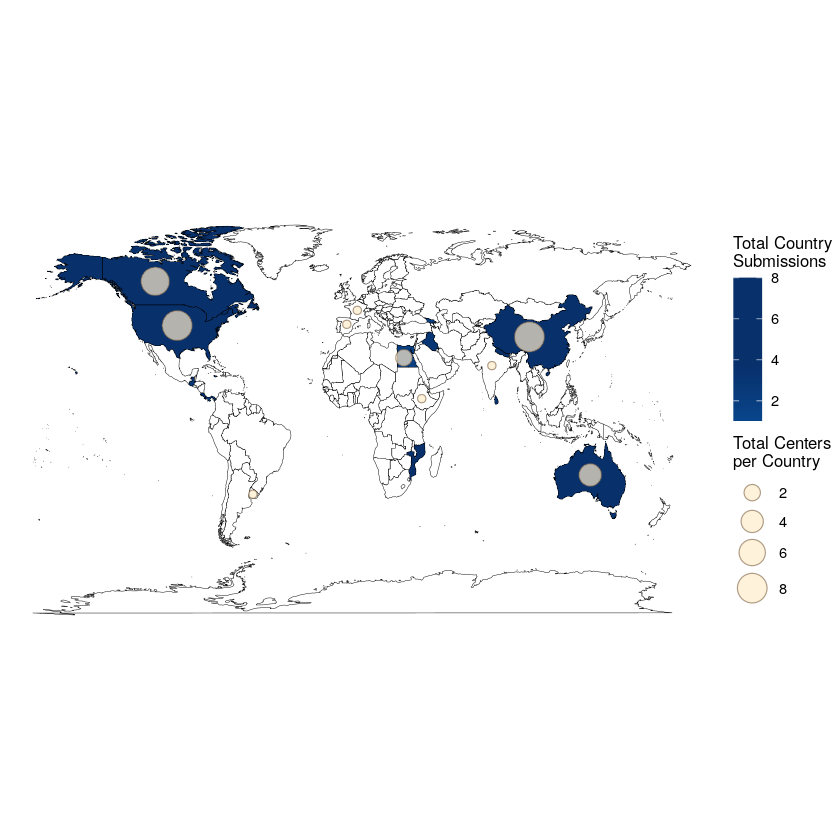

In [15]:
map_data <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx") 
# To view sample repo data use this line:
center_Global <- read_excel("/workspaces/PASS/SGMC/data/output/country_counts_Global_R.xlsx")
# To view paper SGMC data use this line by uncommenting and commenting above line:
# center_Global <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/world_centercount.xlsx")
# Make the region names in both datasets lowercase for consistent matching
map_data$region <- tolower(map_data$region)
center_Global$region <- tolower(center_Global$region)

# Merge the datasets based on the 'region' column
merged_data <- merge(map_data, center_Global[, c("region", "sample")], by="region", all.x=TRUE, suffixes=c(".map", ".center"))

# Replace the sample values in map_data with the sample values from center_Global if the regions match
merged_data$sample.map <- ifelse(!is.na(merged_data$sample.center), merged_data$sample.center, merged_data$sample.map)

# Keep only the desired columns
final_data <- merged_data[, c("long", "lat", "group", "order", "region", "subregion", "sample.map")]

# Rename the sample column
colnames(final_data)[colnames(final_data) == "sample.map"] <- "sample"
final_data <- final_data[order(final_data$order), ]
# Write out the merged data
write_xlsx(final_data, "/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx")


map <- read_excel("/workspaces/PASS/SGMC/rstudio_maps/data/rworldmap_submissions.xlsx") 


unique_samples <- sort(unique(center_Global$sample))
color_breaks <- unique_samples
colors <- c('white','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b')
# count_breaks <- c(1,10,100,1000,2000)
# labels <- c('>1','>10','>100','>1000','>2000')


p2<-ggplot(data = map) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = sample), color = "black", size=0.13)+
  coord_fixed(1.3) +
  scale_fill_gradientn(name = "Submissions",
                      na.value = "white",
                      limits = range(center_Global$sample),
                      colors =  colors[c(1, seq_along(colors), length(colors))], 
                      values  = c(0, scales::rescale(color_breaks, 
                      from = range(map$sample)), 1),
                      guide="colorbar")+
                      theme_void() + theme(legend.title=element_text(size = 9)) + 
                      geom_point(data=center_Global, aes(x=long, y=lat, size=sample),colour="#8B7357",fill="#FFECCC",pch=21, alpha=I(0.7))+
                      scale_size(range=c(2,8),guide="legend") +
                      guides(fill=guide_colorbar("Total Country \nSubmissions",order =1), size = guide_legend("Total Centers\nper Country", order=2)) + theme(legend.title=element_text(size=10))
p2


ggsave(
    filename="/workspaces/PASS/SGMC/data/output/world_map.pdf",
    plot = p2,
    device = "pdf")